In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Receiving objects: 100% (76/76), 318.16 KiB | 2.18 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.profile
./root/.vimrc
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.condarc
./root/.bashrc.biolab
./root/.tmux.conf
--2024-05-13 02:35:48--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143351488 (137M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 136.71M  

In [ ]:
!conda install -y bedtools bioawk samtools

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: | / - done

## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - bedtools
    - bioawk
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    bedtools-2.31.1            |       hf5e1c6e_1         1.5 MB  bioconda
    bioawk-1.0                 |      he4a0461_10         198 KB  bioconda
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    conda-24.4.0               |  py312h7900ff3_0         1.1 MB  conda-forge
    htslib-1.20                |       h81da01d_0         2.9 MB  bioconda
    libcurl-8.7.1              |       h251f7ec_0         424 KB
    libdeflate-1.20 

In [ ]:
%cd /content/drive/MyDrive/binfo1-work-cp/

/content/drive/MyDrive/binfo1-work-cp


In [ ]:
!grep '	start_codon	.*	+	.*transcript_support_level "1"' ./binfo1-datapack1/gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-start.gtf
!head gencode-start.gtf

chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000134384.8
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000027036.11
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000150971.8
chr1	HAVANA	start_codon	4928137	4928139	.	+	0	ENSMUST00000081551.14
chr1	HAVANA	start_codon	5154674	5154676	.	+	0	ENSMUST00000044369.13
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000160777.8
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000027038.11
chr1	HAVANA	start_codon	6300227	6300229	.	+	0	ENSMUST00000027040.13
chr1	HAVANA	start_codon	6429555	6429557	.	+	0	ENSMUST00000133144.4
chr1	HAVANA	start_codon	6839122	6839124	.	+	0	ENSMUST00000140079.8


In [ ]:
# 아래 공백 중 일부는 "탭(Tab)" 문자입니다. 입력하기 힘들 때는 텍스트 편집기에서 입력해서 복사&붙여넣기 하면 됩니다.
!grep '	exon	.*	+	' ../binfo1-datapack1/gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-plusexon.gtf
!head gencode-plusexon.gtf

chr1	HAVANA	exon	3143476	3144545	.	+	.	ENSMUST00000193812.2
chr1	ENSEMBL	exon	3172239	3172348	.	+	.	ENSMUST00000082908.3
chr1	HAVANA	exon	3322980	3323459	.	+	.	ENSMUST00000192857.2
chr1	HAVANA	exon	3536810	3536910	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3583628	3583776	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3602018	3602943	.	+	.	ENSMUST00000192183.2
chr1	HAVANA	exon	3750378	3752011	.	+	.	ENSMUST00000193244.2
chr1	HAVANA	exon	3822233	3824583	.	+	.	ENSMUST00000194454.2
chr1	HAVANA	exon	4566774	4569601	.	+	.	ENSMUST00000193450.2
chr1	HAVANA	exon	4567697	4567877	.	+	.	ENSMUST00000194935.2


In [ ]:
# 아래 공백 중 일부는 "탭(Tab)" 문자입니다. 입력하기 힘들 때는 텍스트 편집기에서 입력해서 복사&붙여넣기 하면 됩니다.
!bedtools intersect -a gencode-start.gtf -b gencode-plusexon.gtf -wa -wb | \
 awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $4-1, $16; }' | \
 sort -k1,1 -k2,3n -k4,4 > gencode-exons-containing-startcodon.bed
!head gencode-exons-containing-startcodon.bed; tail gencode-exons-containing-startcodon.bed

chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4928036	4928199	ENSMUST00000081551.14	4928136	+
chr1	5154639	5154786	ENSMUST00000044369.13	5154673	+
chr1	5659227	5659528	ENSMUST00000027038.11	5659271	+
chr1	5659257	5659528	ENSMUST00000160777.8	5659271	+
chr1	6300182	6300297	ENSMUST00000027040.13	6300226	+
chr1	6429441	6429738	ENSMUST00000133144.4	6429554	+
chr1	6839121	6839176	ENSMUST00000043578.13	6839121	+
chrY	80939672	80939804	ENSMUST00000185340.2	80939686	+
chrY	81470683	81470815	ENSMUST00000187135.2	81470697	+
chrY	82237903	82238035	ENSMUST00000185636.2	82237917	+
chrY	83043623	83043755	ENSMUST00000187165.2	83043637	+
chrY	84109956	84110088	ENSMUST00000185776.7	84109970	+
chrY	84759361	84759493	ENSMUST00000186110.2	84759375	+
chrY	86074448	86074580	ENSMUST00000188754.2	86074462	+
chrY	87129500	87129632	ENSMUST00000189543.7	87129514	+
chrY	87563647	87563779	ENSMUST0000

In [ ]:
# siLuc (control)
!(samtools view -H ../binfo1-datapack1/RPF-siLuc.bam; \
  samtools view -F20 ../binfo1-datapack1/RPF-siLuc.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLuc.bam

In [ ]:
!ls -al *RPF-siLuc.bam

-rw------- 1 root root 554373659 May 12 09:09 filtered-RPF-siLuc.bam


In [ ]:
!bedtools genomecov -ibam filtered-RPF-siLuc.bam -bg -5 > fivepcounts-RPF-siLuc.bed
!head fivepcounts-RPF-siLuc.bed

chr1	3176534	3176535	1
chr1	3196256	3196257	1
chr1	3221526	3221527	1
chr1	3221542	3221543	2
chr1	3221545	3221546	3
chr1	3221546	3221547	2
chr1	3221548	3221550	1
chr1	3221571	3221572	1
chr1	3221897	3221898	1
chr1	3221994	3221995	1


In [ ]:
!bedtools intersect -a fivepcounts-RPF-siLuc.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLuc.txt
!head fivepcounts-filtered-RPF-siLuc.txt

chr1	4878048	4878049	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878048	4878049	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878077	4878078	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878101	4878102	4	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878101	4878102	4	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878101	4878102	4	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878103	4878104	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878103	4878104	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+


In [ ]:
# !bedtools intersect -a gencode-start.gtf -b gencode-plusexon.gtf -wa -wb

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
chr18	HAVANA	start_codon	57313558	57313560	.	+	0	ENSMUST00000075770.13	chr18	HAVANA	exon	57313541	57313673	.	+	.	ENSMUST00000075770.13
chr18	HAVANA	start_codon	57313558	57313560	.	+	0	ENSMUST00000075770.13	chr18	HAVANA	exon	57313541	57313673	.	+	.	ENSMUST00000139892.2
chr18	HAVANA	start_codon	57313558	57313560	.	+	0	ENSMUST00000139892.2	chr18	HAVANA	exon	57313541	57313673	.	+	.	ENSMUST00000075770.13
chr18	HAVANA	start_codon	57313558	57313560	.	+	0	ENSMUST00000139892.2	chr18	HAVANA	exon	57313541	57313673	.	+	.	ENSMUST00000139892.2
chr18	HAVANA	start_codon	57495525	57495527	.	+	0	ENSMUST00000025490.10	chr18	HAVANA	exon	57495505	57495621	.	+	.	ENSMUST00000025490.10
chr18	HAVANA	start_codon	57495525	57495527	.	+	0	ENSMUST00000025490.10	chr18	HAVANA	exon	57495505	57495621	.	+	.	ENSMUST00000238069.2
chr18	HAVANA	start_codon	57610185	57610187	.	+	0	ENSMUST00000091892.4	chr18	HAVANA	exon	57610086	57611205	.	+	.	ENSMUST00000091892.4
chr18	HAVANA	start_codon	5

In [ ]:
#!bedtools intersect -a gencode-start.gtf -b gencode-plusexon.gtf -wa -wb | \
# awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $4-1, $16; }'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
chr11	79482037	79482260	ENSMUST00000017783.13	79482101	+
chr11	79883931	79884425	ENSMUST00000017692.15	79884145	+
chr11	79980225	79980662	ENSMUST00000017694.7	79980596	+
chr11	80044930	80045135	ENSMUST00000021050.14	80045041	+
chr11	80074676	80075081	ENSMUST00000017839.3	80074742	+
chr11	80099880	80100149	ENSMUST00000055056.16	80100073	+
chr11	80099909	80100149	ENSMUST00000092857.13	80100073	+
chr11	80099944	80100149	ENSMUST00000017831.16	80100073	+
chr11	80191737	80192097	ENSMUST00000017836.8	80191986	+
chr11	80274104	80274321	ENSMUST00000165565.8	80274280	+
chr11	80274128	80274321	ENSMUST00000017567.14	80274280	+
chr11	80274222	80274321	ENSMUST00000053740.15	80274280	+
chr11	80319448	80319581	ENSMUST00000173938.8	80319490	+
chr11	80319450	80319581	ENSMUST00000017572.14	80319490	+
chr11	80368191	80368749	ENSMUST00000147694.2	80368334	+
chr11	80703331	80703515	ENSMUST00000040865.9	80703384	+
chr11	80753785	80754051	ENSMUST00000103223.8	80753864	+
chr

In [ ]:
#!bedtools intersect -a gencode-start.gtf -b gencode-plusexon.gtf -wa -wb | \
# awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $4-1, $16; }' | \
# sort -k1,1 -k2,3n -k4,4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
summary = pd.read_table("fivepcounts-filtered-RPF-siLuc.txt", sep ='\t')
summary.tail()
# exon start site에서 시작 부분을 모두 뺀다.

,chr1,4878048,4878049,1,chr1.1,4878010,4878205,ENSMUST00000134384.8,4878136,+
340493,chrY,87129502,87129503,1,chrY,87129500,87129632,ENSMUST00000189543.7,87129514,+
340494,chrY,87129574,87129575,1,chrY,87129500,87129632,ENSMUST00000189543.7,87129514,+
340495,chrY,87563721,87563722,1,chrY,87563647,87563779,ENSMUST00000186493.2,87563661,+
340496,chrY,88065994,88065995,1,chrY,88065992,88066124,ENSMUST00000187146.2,88066006,+
340497,chrY,88066066,88066067,1,chrY,88065992,88066124,ENSMUST00000187146.2,88066006,+


In [ ]:
summary.loc[340498] = ['chr1', '4878048', '4878049', '1', 'chr1', '4878010', '4878205', 'ENSMUST00000134384.8', '4878136', '+']
summary.tail()

,chr1,4878048,4878049,1,chr1.1,4878010,4878205,ENSMUST00000134384.8,4878136,+
340494,chrY,87129574,87129575,1,chrY,87129500,87129632,ENSMUST00000189543.7,87129514,+
340495,chrY,87563721,87563722,1,chrY,87563647,87563779,ENSMUST00000186493.2,87563661,+
340496,chrY,88065994,88065995,1,chrY,88065992,88066124,ENSMUST00000187146.2,88066006,+
340497,chrY,88066066,88066067,1,chrY,88065992,88066124,ENSMUST00000187146.2,88066006,+
340498,chr1,4878048,4878049,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+


In [ ]:
summary.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
summary.tail()

,a,b,c,d,e,f,g,h,i,j
340494,chrY,87129574,87129575,1,chrY,87129500,87129632,ENSMUST00000189543.7,87129514,+
340495,chrY,87563721,87563722,1,chrY,87563647,87563779,ENSMUST00000186493.2,87563661,+
340496,chrY,88065994,88065995,1,chrY,88065992,88066124,ENSMUST00000187146.2,88066006,+
340497,chrY,88066066,88066067,1,chrY,88065992,88066124,ENSMUST00000187146.2,88066006,+
340498,chr1,4878048,4878049,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+


In [41]:
summary['i'] = summary['i'].astype(int)
summary['b'] = summary['b'].astype(int)
summary['k'] = summary['b']-summary['i']
summary.head()

,a,b,c,d,e,f,g,h,i,j,k
0,chr1,4878048,4878049,1,chr1,4878045,4878205,ENSMUST00000027036.11,4878136,+,-88
1,chr1,4878077,4878078,1,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+,-59
2,chr1,4878077,4878078,1,chr1,4878045,4878205,ENSMUST00000027036.11,4878136,+,-59
3,chr1,4878077,4878078,1,chr1,4878052,4878205,ENSMUST00000150971.8,4878136,+,-59
4,chr1,4878101,4878102,4,chr1,4878010,4878205,ENSMUST00000134384.8,4878136,+,-35


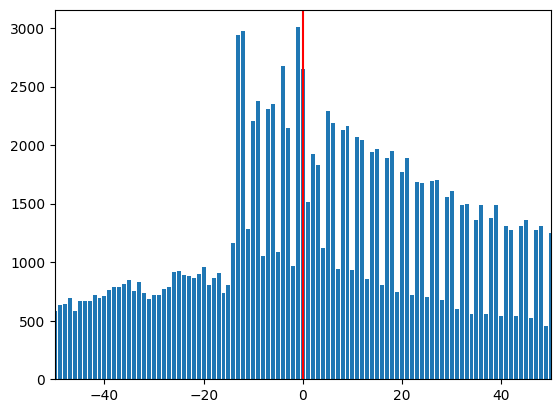

In [42]:
plt.bar(summary['k'].value_counts().index, summary['k'].value_counts().values)
plt.xlim([-50, 50])
plt.axvline(x = 0, color = 'r')

In [34]:
# siLin28
!(samtools view -H ../binfo1-datapack1/RPF-siLin28a.bam; \
  samtools view -F20 ../binfo1-datapack1/RPF-siLin28a.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLin28a.bam

!bedtools genomecov -ibam filtered-RPF-siLin28a.bam -bg -5 > fivepcounts-RPF-siLin28a.bed
!bedtools intersect -a fivepcounts-RPF-siLin28a.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLin28a.txt



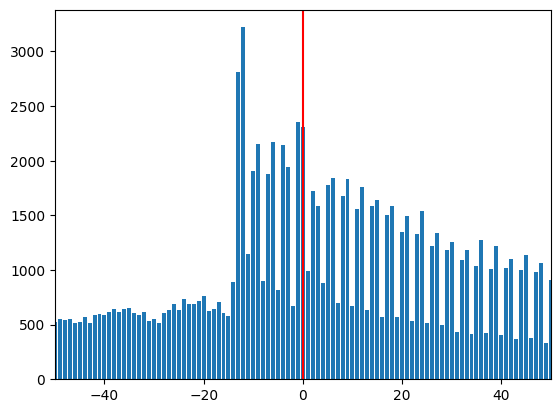

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
summary2 = pd.read_table("fivepcounts-filtered-RPF-siLin28a.txt", sep ='\t')
summary2.loc[280279] = ['chr1', '4878043', '4878044', '1', 'chr1', '4878010', '4878205', 'ENSMUST00000134384.8', '4878136', '+']
summary2.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
summary2['i'] = summary2['i'].astype(int)
summary2['b'] = summary2['b'].astype(int)
summary2['k'] = summary2['b']-summary2['i']
plt.bar(summary2['k'].value_counts().index, summary2['k'].value_counts().values)
plt.xlim([-50, 50])
plt.axvline(x = 0, color = 'r')